In [2]:
import sys
import hashlib
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sys.path.append("..")

from itertools import product

from opdynamics.simulation.simulation import initialize_model
from opdynamics.utils.model_modification import modify_model
from opdynamics.utils.types import Parameters
# from opdynamics.utils.tools import get_mean_stats, get_path, make_dict, validate_params

In [4]:
param_list = {
    "graph_type": ["barabasi"],
    "network_size": [500],
    "memory_size": [256],
    "code_length": [5],
    "kappa": [0, 15, 30],
    "lambd": [0, 0.3, 1],
    "alpha": [1, 0.6, 0.2],
    "omega": [0],
    "gamma": [-1, 0, 1],
    "preferential_attachment": [2],
    "polarization_grouping_type": [0],
    "T": [500],
    "num_repetitions": [200],
    "early_stop": [True],
    "epsilon": [1e-8],
    "results_path": ["results/case_2/"]
}

experiments_path = "../results/case_2"

In [5]:
# mean_stats = get_mean_stats(param_list, experiments_path, 500)
params = list(product(*param_list.values()))
params = [x[:-5] for x in params]

In [6]:
params[0]

('barabasi', 500, 256, 5, 0, 0, 1, 0, -1, 2, 0)

In [5]:
counting = pd.DataFrame(columns = ["kappa", "lambd", "alpha", "omega", "gamma", "runs"])
for param in params:
    param_dict = make_dict(param)
    p = get_path(param, experiments_path)
    n_runs = len([x for x in os.listdir(p) if "stats" in x])
    
    counting = pd.concat([counting, pd.DataFrame([{
        "kappa": param_dict["kappa"],
        "lambd": param_dict["lambd"],
        "alpha": param_dict["alpha"],
        "omega": param_dict["omega"],
        "gamma": param_dict["gamma"],
        "runs":  n_runs
    }])], axis = 0, ignore_index = True)

In [6]:
counting.sort_values("runs").to_csv("temp.csv")

In [10]:
param_list = {
    "graph_type": ["barabasi"],
    "network_size": [500],
    "memory_size": [256],
    "code_length": [5],
    "kappa": [0, 15, 30],
    "lambd": [0, 0.3, 1],
    "alpha": [0.8, 0.6, 0.5],
    "omega": [0.5, 0.4, 0.2],
    "gamma": [-1, 0, 1],
    "preferential_attachment": [2],
    "polarization_grouping_type": [0],
    "T": [500],
    "num_repetitions": [200],
    "early_stop": [True],
    "epsilon": [1e-8],
    "results_path": ["results/case_3/"]
}
experiments_path = "/media/patrick/Tranqueiras/entropia_grafos_resultados/results/case_3"

In [34]:
# mean_stats = get_mean_stats(param_list, experiments_path, 500)
params = list(product(*param_list.values()))
params = [x for x in params if validate_params(make_dict(x))]

counting_2 = pd.DataFrame(columns = ["kappa", "lambd", "alpha", "omega", "gamma", "runs"])
for param in params:
    try:
        param_dict = make_dict(param)
        p = get_path(param, experiments_path)
        n_runs = len([x for x in os.listdir(p) if "stats" in x])
        
        counting_2 = pd.concat([counting_2, pd.DataFrame([{
            "kappa": param_dict["kappa"],
            "lambd": param_dict["lambd"],
            "alpha": param_dict["alpha"],
            "omega": param_dict["omega"],
            "gamma": param_dict["gamma"],
            "runs":  n_runs
        }])], axis = 0, ignore_index = True)
    except:
        print(param)

('barabasi', 500, 256, 5, 0, 0, 0.8, 0.2, -1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.8, 0.2, 0, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.8, 0.2, 1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.6, 0.4, -1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.6, 0.4, 0, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.6, 0.4, 1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.6, 0.2, -1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.6, 0.2, 0, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.6, 0.2, 1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.5, 0.5, -1, 2, 0, 500, 200, True, 1e-08, 'results/case_3/')
('barabasi', 500, 256, 5, 0, 0, 0.5, 0.5, 0, 2, 0, 500, 200, True,

In [13]:
full_counting = pd.concat([counting, counting_2], axis = 0, ignore_index = True)

In [14]:
full_counting.to_csv("teste.csv")

In [27]:
full_counting = pd.read_csv("teste.csv", index_col = 0)

In [26]:
full_counting["kappa"].unique()

array([ 0, 15, 30])

In [33]:
len(full_counting)

81

In [31]:
sum(full_counting["runs"] < 100)

62

In [32]:
sum(full_counting["runs"] > 100)

19

In [20]:
212/(212+30)

0.8760330578512396

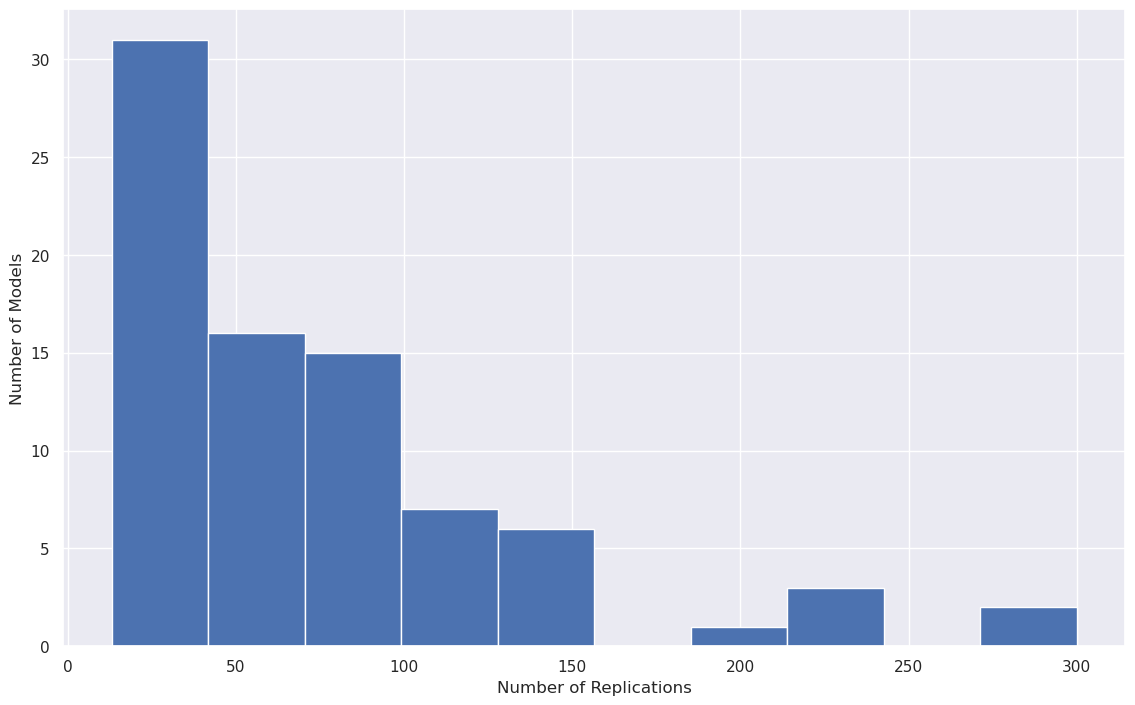

In [30]:
full_counting["runs"].hist(bins = 10)
plt.xlabel("Number of Replications")
plt.ylabel("Number of Models")
plt.show()

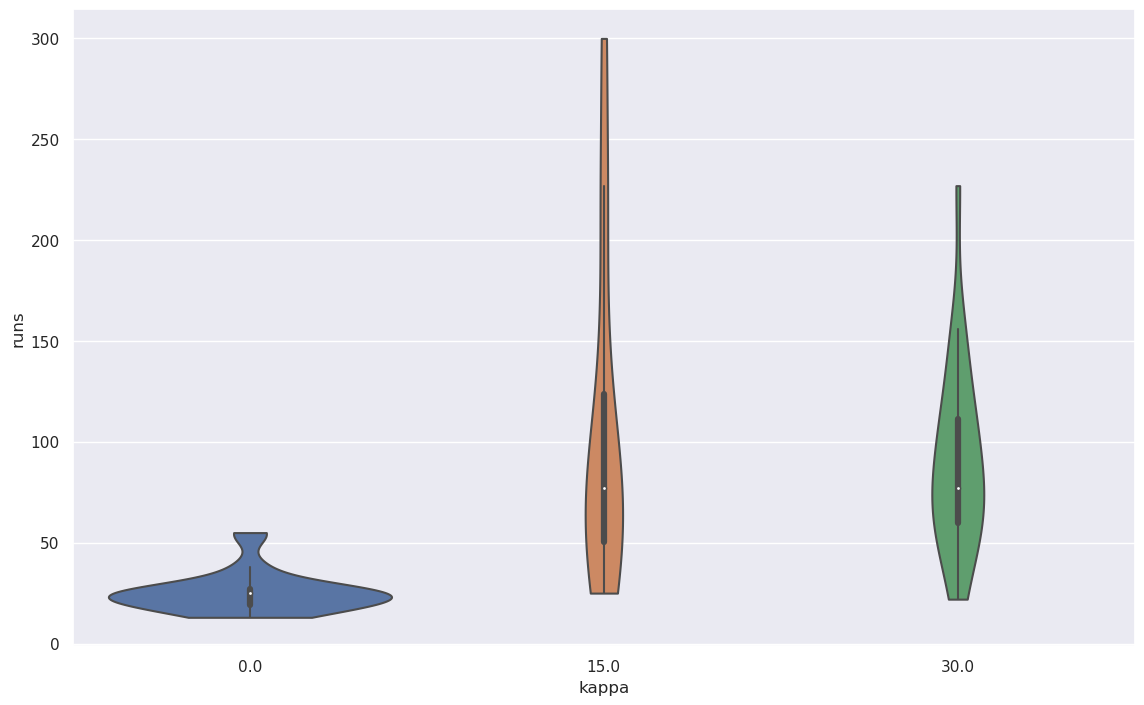

In [29]:
sns.violinplot(data = full_counting.astype(float), x = "kappa", y = "runs", cut = 0)
plt.show()

***

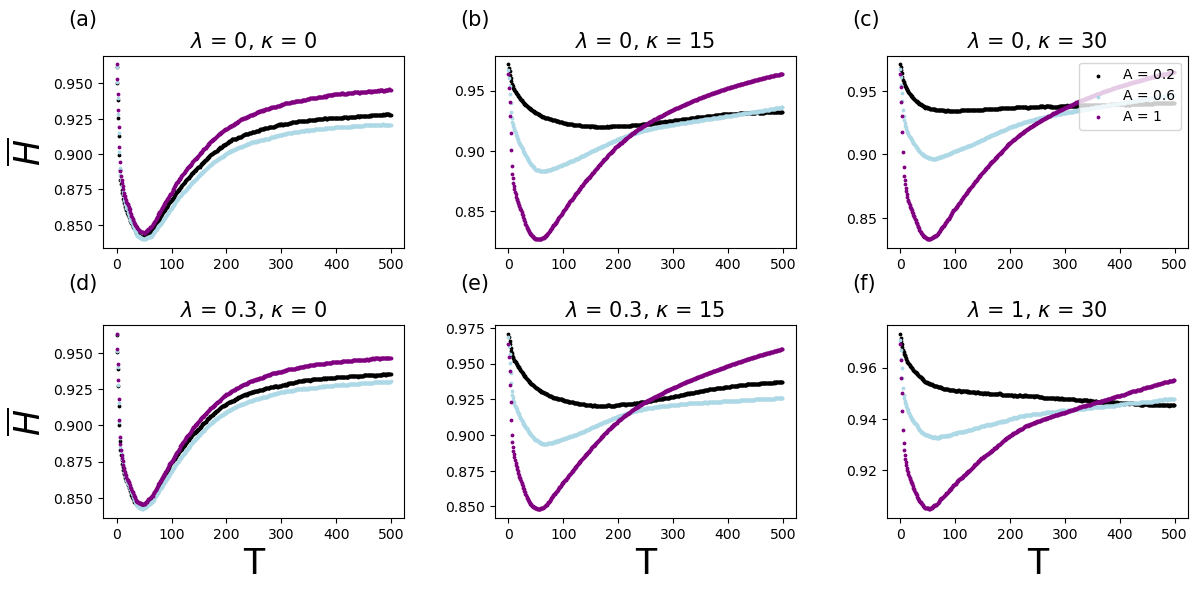

In [21]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (14, 6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.30)
for ax in axs[1]:
    ax.set_xlabel("T", fontsize = 25)

for k in [0, 1]:
    axs[k][0].set_ylabel(r"$\overline{H}$", fontsize = 25)
    
# axs[0, 0].set_ylim([3.5, 5])
# axs[0, 1].set_ylim([0, 5])
# axs[0, 2].set_ylim([0, 5])
# axs[1, 0].set_ylim([3.5, 5])
# axs[1, 1].set_ylim([0, 5])
# axs[1, 2].set_ylim([3.25, 5])

fig.text(0.10, 0.93, "(a)", fontsize = 15)
fig.text(0.38, 0.93, "(b)", fontsize = 15)
fig.text(0.66, 0.93, "(c)", fontsize = 15)
fig.text(0.10, 0.49, "(d)", fontsize = 15)
fig.text(0.38, 0.49, "(e)", fontsize = 15)
fig.text(0.66, 0.49, "(f)", fontsize = 15)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}

kappas = [0, 15, 30]
lambdas = [0, 0.3]
alpha = [0.2, 0.6, 1]

for i in range(len(alpha)):
    for j in range(len(kappas)):
        for k in range(len(lambdas)):
            if j == 2 and k == 1:
                pass
            else:
                param = (
                    "barabasi",
                    500,
                    256,
                    5,
                    kappas[j],
                    lambdas[k],
                    alpha[i],
                    0,
                    -1,
                    2,
                    0,
                )
                
                results = mean_stats[param]
                mean_entropy = results['Proximity']
                X = range(len(mean_entropy))
                
                axs[k][j].scatter(X, mean_entropy, label = f'A = {alpha[i]}', color = colors[alpha[i]], s = 3)

                axs[k][j].set_title(rf"$\lambda$ = {lambdas[k]}, $\kappa$ = {kappas[j]}", fontsize = 15)
                
for i in range(len(alpha)):
    param = (
        "barabasi",
        500,
        256,
        5,
        30,
        1,
        alpha[i],
        0,
        -1,
        2,
        0,
    )

    results = mean_stats[param]
    mean_entropy = results['Proximity']
    X = range(len(mean_entropy))

    axs[1][2].scatter(X, mean_entropy, label = f'A = {alpha[i]}', color = colors[alpha[i]], s = 3)

    axs[1][2].set_title(rf"$\lambda$ = {1}, $\kappa$ = {30}", fontsize = 15)    

axs[0][2].legend(fontsize = 10, loc = 1)